<a href="https://colab.research.google.com/github/AnUsHkAIT/Hex-Softwares/blob/main/Project_2_Simple_Linear_Regression_on_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Fetch the dataset from OpenML
boston = fetch_openml(name='boston', version=1, as_frame=True)

# Convert to DataFrame
boston_df = boston.frame

# Check the first few rows of the dataset
print(boston_df.head())


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [ ]:
# Check for missing values
print(boston_df.isnull().sum())


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [ ]:
# Define the feature (independent variable) and target (dependent variable)
X = boston_df[['RM']]  # Using 'RM' (average number of rooms) as the feature
y = boston_df['MEDV']   # Using 'MEDV' (housing price) as the target


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Normalize the feature
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

# Display the predicted vs actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())


     Actual  Predicted
173    23.6  23.732383
274    32.4  26.929502
491    13.6  19.684568
72     22.8  20.451129
452    16.1  22.619935


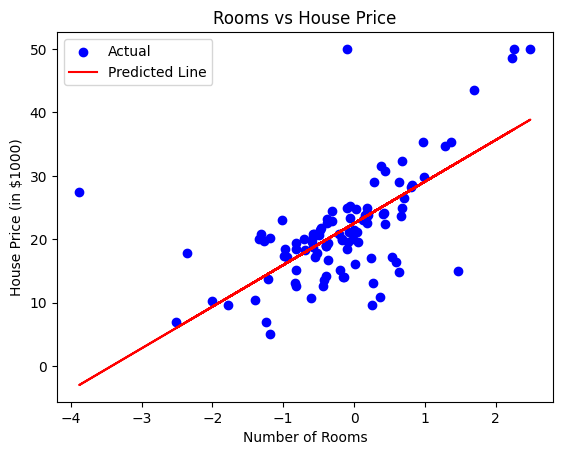

In [ ]:
import matplotlib.pyplot as plt

# Plot the regression line with the test data
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted Line')
plt.title('Rooms vs House Price')
plt.xlabel('Number of Rooms')
plt.ylabel('House Price (in $1000)')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 46.144775347317264
R-squared: 0.3707569232254778
